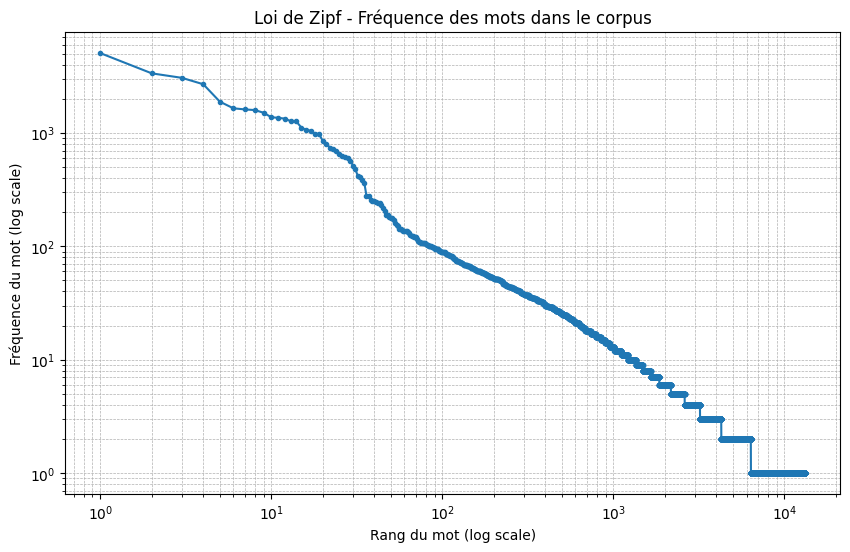

In [14]:
"""
Analyse de la Loi de Zipf sur un corpus de synopsis de films

Ce script utilise spaCy pour tokenizer un corpus de synopsis de films en français,
compte la fréquence des mots, et trace une courbe log-log pour vérifier la distribution
de Zipf dans les données textuelles.

Fonctionnalités :
-----------------
1. Chargement de tous les fichiers `.txt` d’un dossier corpus (`../film_synopses`).
2. Tokenisation avec `spaCy` (modèle `fr_core_news_sm`).
3. Nettoyage : suppression de la ponctuation et des espaces.
4. Comptage de la fréquence de chaque token.
5. Tri des fréquences de mots par ordre décroissant.
6. Affichage d’une courbe en échelle log-log (Loi de Zipf) :
   - Axe X : rang du mot (ordre de fréquence décroissante)
   - Axe Y : fréquence du mot

Pré-requis :
------------
- Python 3
- Bibliothèques : `spacy`, `matplotlib`, `collections`
- Modèle spaCy français (`python -m spacy download fr_core_news_sm`)
- Dossier `../film_synopses` contenant des fichiers `.txt`

Utilité :
---------
- Vérifier si la distribution des mots respecte la loi de Zipf, typique des langues naturelles.
- Aide à l’analyse linguistique du corpus, pour NLP, classification ou génération.

Résultat :
----------
- Une courbe log-log qui doit approximer une ligne droite si la loi de Zipf est respectée.
- Permet d’identifier les mots dominants ou les déséquilibres lexicaux dans les données.

"""

import os
from collections import Counter
import spacy
import matplotlib.pyplot as plt

# Charger spaCy français
nlp = spacy.load('fr_core_news_sm')

corpus_folder = '../film_synopses'

concat_context = []

# Charger tous les fichiers texte du dossier
for filename in os.listdir(corpus_folder):
    if filename.endswith('.txt'):
        with open(os.path.join(corpus_folder, filename), 'r', encoding='utf-8') as f:
            text = f.read()
            doc = nlp(text)
            for token in doc:
                # Filtrer ponctuations et espaces
                if not token.is_punct and not token.is_space:
                    concat_context.append(token.text.lower())

# Compter la fréquence des tokens
concat_context_counter = Counter(concat_context)

# Trier fréquences en ordre décroissant
freq_sorted = sorted(concat_context_counter.values(), reverse=True)

# Afficher la courbe log-log de Zipf
plt.figure(figsize=(10, 6))
plt.loglog(range(1, len(freq_sorted)+1), freq_sorted, marker='.')
plt.title("Loi de Zipf - Fréquence des mots dans le corpus")
plt.xlabel("Rang du mot (log scale)")
plt.ylabel("Fréquence du mot (log scale)")
plt.grid(True, which='both', ls='--', lw=0.5)
plt.show()


